(1, 1)の値の期待値を考える。

2,3列目は無視して考えると、

$$
\begin{pmatrix}
a\\
d\\
g
\end{pmatrix}
$$
の最大値の期待値を考えることになる。

aが最大だとして、aが1,2,3行目にある場合がある。つまり3通り、あり得る。

最大値を考える前の同時分布p(a, d, g)を考えると、すべて0から1までの一様分布で独立なので、確率(確率分布。以下では確率分布を確率と記載しているところが多い。)は
確率変数によらず1になる。
並び替えたあとは3通りが1通りに集約されるので、確率は確率変数によらず3になる。

並び替えたあとに関して、d,gはaより小さければ、自由に設定できる。
$p(d | a) = \frac{1}{a} = p(d | a, g)$, $p(g | a) = \frac{1}{a} = p(g | a, d)$で、
$p(a) = ３\frac{p(a, d, g, not \, ordered)}{p(d | a)p(g | a, d)} = \frac{p(a, d, g, ordered)}{p(d | a)p(g | a, d)} = 3a^2$

このとき、(1,1)成分の期待値は、
$$
\mathbb{E}_{p(a)}[a] = \int_0^1 p(a)a da = \int_0^1 3a^3 da = [0.75 a^4]_0^1 = 0.75
$$


In [8]:
import numpy as np
from scipy.linalg import lu

N = 1000000
dim = 3

sum = np.zeros((dim,dim))

for i in range(N):
    A = np.random.rand(dim, dim)
#    print(A)

    P, L, U = lu(A)
#    print(L)
#    print(U)
#    print(P)

    sum += U

sum = sum / N
print(sum)

[[0.75001339 0.4991516  0.49991674]
 [0.         0.37175156 0.26440408]
 [0.         0.         0.17967031]]


以下では(2,2)の期待値を検討する。不等号は&le;を多用していて、一部重複しているが、十分狭い範囲での重複なので、無視できる。

(1,1)成分が、1列目で最大になることだけを保証したピボット操作を行った場合を考える。

3列目はひとまず無視して考えると、
$$
\begin{pmatrix}
a & b\\
d & e\\
g & h
\end{pmatrix}
\rightarrow 
\begin{pmatrix}
a & b\\
0 & e - \frac{bd}{a}\\
0 & h - \frac{bg}{a}
\end{pmatrix}
$$
ここで、aが決まった状態で、$\frac{d}{a}$を考えると、0以上、1以下の値になり、$p(d | a) = \frac{1}{a}, (0 \leq d \leq a)$の一様分布となるので、
$p(x | a) \equiv p(\frac{d}{a} | a) = 1, (0 \leq x \leq 1)$,同様に、$p(y | a) \equiv p(\frac{g}{a} | a) = 1, (0 \leq y \leq 1)$

上記の式は、
$$
\begin{pmatrix}
a & b\\
0 & e - bx\\
0 & h - by
\end{pmatrix}
$$
このとき、$0 \leq e,b,h,x,y \leq 1$は独立になっている。

よって、p(e,b,x) = p(h, b, y) = 1

$
\mathbb{E}[e-bx] = \int_0^1 \int_0^1 \int_0^1 (e-bx) p(e,b,x) de\,db\,dx = \int_0^1 \int_0^1 \int_0^1 (e-bx) de\,db\,dx = 0.25
$
これを以下のコードで確認する。

In [2]:
import numpy as np

N = 100000
dim = 3

def myLU(A):
    size = len(A)

#    print("original : ")
#    print(A)
    
#    for i in range(size):
    for i in range(1):
#        print("i : ", i)
        index = np.argmax(np.abs(A[i:, i])) + i
        tmp = np.array(A[i, : ])
        A[i, : ] = A[index, : ]
        A[index, : ] = tmp

#        print(A)

        for j in range(i + 1, size):
            A[j, : ] -= (A[j, i] / A[i, i]) * A[i, : ]
        #print(A)

    return A

sum = np.zeros((dim,dim))

for i in range(N):
    A = np.random.rand(dim, dim)
#    print(A)

    U = myLU(A)
#    print(L)
#    print(U)
#    print(P)

    sum += U

sum = sum / N
print("sum : \n", sum)

sum : 
 [[7.49457297e-01 5.00820574e-01 4.99271080e-01]
 [9.31001017e-21 2.48636222e-01 2.50743144e-01]
 [7.49670745e-21 2.49982796e-01 2.50658225e-01]]


次にw = e - bx,bを定数としたときにp(w|b)を考える。このとき、$-b \leq w \leq 1$。

$$p(w|b) = 1 + \frac{w}{b} (-b \leq w \leq 0)$$
$$p(w|b) = 1 (0 \leq w \leq 1 - b)$$
$$p(w|b) = \frac{1 - w}{b} (1 - b \leq w \leq 1)$$

これはz = g - hyでbを定数としたときも同様。
$$p(z|b) = 1 + \frac{z}{b} (-b \leq z \leq 0)$$
$$p(z|b) = 1 (0 \leq z \leq 1 - b)$$
$$p(z|b) = \frac{1 - z}{b} (1 - b \leq z \leq 1)$$

これを以下のコードで確認する。

(array([0.02004346, 0.05411734, 0.08685499, 0.10088542, 0.1436448 ,
        0.18506795, 0.21446502, 0.22114618, 0.26056498, 0.27994033,
        0.32336782, 0.31668667, 0.39285182, 0.40287355, 0.43160251,
        0.46634451, 0.51712127, 0.53248792, 0.57190673, 0.55253138,
        0.61132553, 0.66410665, 0.65809361, 0.71555153, 0.70018487,
        0.7362631 , 0.82913114, 0.81510071, 0.82178187, 0.9059644 ,
        0.90128759, 0.91999482, 0.94805567, 1.00016866, 1.00751793,
        1.01419908, 1.01687155, 0.98146143, 0.97277593, 0.98279766,
        0.98747447, 1.00217301, 1.03157008, 0.9974962 , 1.00083678,
        1.05896281, 1.00484547, 1.02154835, 0.96542666, 1.00217301,
        0.98413389, 1.03557877, 0.97945709, 1.02555704, 1.00952228,
        1.02555704, 0.9801252 , 0.9888107 , 1.04426427, 0.96609478,
        1.03090197, 1.02288458, 0.9801252 , 1.02021212, 1.03023385,
        1.01152662, 1.01353097, 0.9493919 , 0.91932671, 0.96342232,
        0.84115721, 0.86454125, 0.8144326 , 0.83

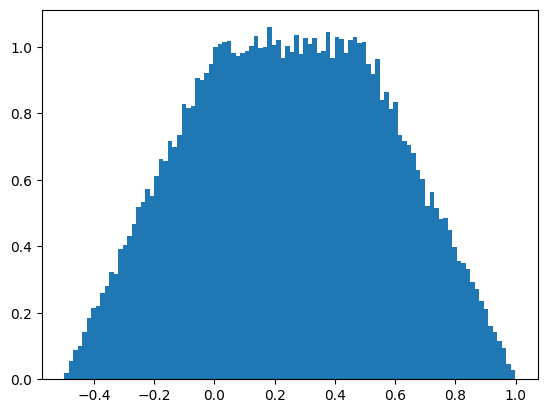

In [3]:
import numpy as np
import matplotlib.pyplot as plot

N = 100000

#b = 0.1
b = 0.5
#b = 1

e = np.random.rand(N)
x = np.random.rand(N)

w = e - b*x

plot.hist(w, 100, density=True)



bが与えられたときの(2,2)成分の期待値vを考える。w,zは独立なので、
p(w, z | b) = p(w | b) p(z | b) = p(w | b) p(z | w, b)

bは$0 \leq b \leq 1$で、w,zに対して、独立なので、p(b) = 1

よって、$p(w, z, b) = p(b)p(w | b)p(z | w, b)$,$f(w, z, b) = max(w, z)$として、(2,2)成分$f(w,z,b)$の期待値を求める。
$$
\mathbb{E}_{p(w, z, b)}[f(w, z, b)] = \int_{V} p(w, z, b)f(w, z, b) dV = \int_{f(w, z, b) = w} w p(w, z, b) dV + \int_{f(w, z, b) = z} z p(w, z, b) dV
$$
w,zは対称になっているため、
$$
\mathbb{E}_{p(w, z, b)}[f(w, z, b)] = 2\int_{f(w, z, b) = w} w p(w, z, b) dV
$$
ここで、w,z,bによって、f(w,z,b)がどのように変わるかを確認しておく。
<table>
    <thead>
    <tr>
        <th style = "border-style:double; border-width:5px;">f(w,z,b)</th>
        <th style = "border-style:double; border-width:5px;">-b &le; w &le; 0</th>
        <th style = "border-style:double; border-width:5px;">0 &le; w &le; 1-b</th>
        <th style = "border-style:double; border-width:5px;">1 - b &le; w &le; 1</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <th style = "border-style:double; border-width:5px;">-b &le; z &le; 0</td>
        <td>if (-b &le; w &le; z &le; 0) : w &emsp; (Cond. A)<br> if (-b &le; z &le; w &le; 0) : z</td>
        <td>if b &le; 0.5 : <br>&emsp;if ((b - 1) &le; -w &le; z, -b &le; z &le; 0) : w &emsp; (Cond. B)<br>
        &emsp;if (-b &le; z &le; -w &le; (b - 1), w &ge; 0) : z<br>
        if b &ge; 0.5 : <br>&emsp;if ((b - 1) &le; -w &le; z &le; 0) : w &emsp; (Cond. C)<br>
        &emsp;if (-b &le; z &le; -w, b - 1 &le; -w &le; 0) : z</td>
        <td>if b &le; 0.5 : w &emsp; (Cond. D)<br> if b &ge; 0.5 : <br>&emsp;if (-w &le; z &le; b - 1) : w &emsp; (Cond. E)<br>
        &emsp;if (-b &le; z &le; -w &le; (b - 1)) : z</td>
    </tr>
    <tr>
        <th  style = "border-style:double; border-width:5px;">0 &le; z &le; 1 - b</td>
        <td>if b &le; 0.5 : <br>&emsp;if (0 &le; z &le; (1 - b), 0 &le; z &le; -w &le; b) : w &emsp; (Cond. F)<br>
        &emsp;if (0 &le; w &le; z &le; (1 - b)) : z<br>if b &ge; 0.5 : <br>&emsp;if ((b - 1) &le; -w &le; z &le; 0) : w &emsp; (Cond. G)<br>
        &emsp;if (0 &le; -w &le; z &le; (1 - b), -b &le; -b &le; w) : z</td>
        <td>if (0 &le; z &le; w) : w &emsp; (Cond. H)<br> if (w &le; z &le; 1 - b) : z</td>
        <td>w &emsp; (Cond. I)</td>
    </tr>
    <tr>
        <th  style = "border-style:double; border-width:5px;">1 - b &le; z &le; 1</td>
        <td>if b &le; 0.5 : z<br> if b &ge; 0.5 : <br>&emsp;if (1 - b &le; z &le; -w &le; b) : w &emsp; (Cond. J)<br>
        &emsp;if (-w &le; z &le; 1) : z</td>
        <td>z</td>
        <td>if ((1 - b) &le; z &le; w) : w &emsp; (Cond. K)<br> if (w &le; z &le; 1) : z</td>
    </tr>
    </tbody>
</table>
$\int_{f(w, z, b) = w} w p(w, z, b) dV$に関して、上記の表のCond.AからKに分解して計算する。

$$
\int_{f(w, z, b) = w} w p(w, z, b) dV = \sum_i \int_{Cond._i} w p(w, z, b) dV = \sum_i \int_{Cond._i} w p(b) p(w | b)  p(z | b, w)dV
= \sum_i \int_{Cond._i} w p(w | b)  p(z | b, w)dV
$$

++++それぞれ計算する。

$$
Cond. A : \int_{Cond._A} w p(w | b)  p(z | b, w)dV 
= \int_0^1 \int_{-b}^{0} \int_{w}^{0} (1 + \frac{w}{b})(1 + \frac{z}{b}) \, w dz \, dw \, db
= \int_0^1 \int_{-b}^{0} (w + \frac{w^2}{b})[z + \frac{z^2}{2b}]_{w}^{0} dw \, db\\
= \int_0^1 \int_{-b}^{0} -(w + \frac{w^2}{b})(w + \frac{w^2}{2b}) dw \, db
= \int_0^1 -[\frac{w^3}{3} + \frac{3w^4}{8b} + \frac{w^5}{10b^2}]_{-b}^{0} db
= \int_0^1 (-\frac{b^3}{3} + \frac{3b^3}{8} - \frac{b^3}{10}) db
= - \int_0^1 \frac{7b^3}{120} db = - \frac{7}{480}
$$
$$
Cond. B : \int_{Cond._B} w p(w | b)  p(z | b, w)dV
= \int_0^{0.5} \left\{ \int_{b}^{1-b} \int_{-b}^{0} 1\, (1 + \frac{z}{b}) \, w dz \, dw + \int_{0}^{b} \int_{-w}^{0} 1\, (1 + \frac{z}{b}) \, w dz \, dw \right\} db\\
= \int_0^{0.5} \left\{ \int_{b}^{1-b} \frac{bw}{2} \, dw + \int_{0}^{b} w(w - \frac{w^2}{b}) dw \right\} db
= \int_0^{0.5} \left\{ (\frac{b(1 - 2b)}{4}) + (\frac{b^3}{3} - \frac{b^3}{4}) \right\}  db \\
= [\frac{b^2}{8} - \frac{b^3}{6} + \frac{b^4}{48}]_0^{0.5}
= (\frac{1}{2} - \frac{1}{3} + \frac{1}{48}){0.5}^4
= (\frac{3}{16}){0.5}^4
= \frac{3}{256}
$$
$$
Cond. C : \int_{Cond._C} w p(w | b)  p(z | b, w)dV
= \int_{0.5}^{1} \int_{0}^{1-b} \int_{-w}^{0} 1\, (1 + \frac{z}{b}) \, w dz \, dw \, db
= \int_{0.5}^{1} \int_{0}^{1-b} w(w - \frac{w^2}{b})dw \, db\\
= \int_{0.5}^{1} \left( \frac{(1 - b)^3}{3} - \frac{(1 - b)^4}{4b} \right)db
= \left[ -\frac{ln\,b}{4} + (\frac{1}{3} + 1)b - (\frac{1}{2} + \frac{3}{4})b^2 + (\frac{1}{3} + \frac{1}{3})b^3 - \frac{b^4}{20} \right]_{0.5}^{1}\\
= -\frac{ln\,2}{4} + \frac{2}{3} - \frac{15}{16} + \frac{14}{24} - \frac{3}{64}
= -\frac{ln\,2}{4} + \frac{17}{64}
$$
$$
Cond. D : \int_{Cond._D} w p(w | b)  p(z | b, w)dV
= \int_0^{0.5} \int_{1 - b}^{1} \int_{-b}^{0} (\frac{1 - w}{b})(1 + \frac{z}{b}) \, w dz \, dw \, db
= \int_0^{0.5} \int_{1 - b}^{1} w(\frac{1 - w}{2}) dw \, db
= \int_0^{0.5} \left[\frac{w^2}{4} - \frac{w^3}{6}\right]_{1 - b}^{1} db\\
= \int_0^{0.5} \left(\frac{2b - b^2}{4} - \frac{3b -3b^2 + b^3}{6}\right) db
= \left[-\frac{b^3}{12} + \frac{b^3}{6} - \frac{b^4}{24}\right]_0^{0.5}
= \frac{1}{16}\frac{1}{8}
= \frac{1}{128}
$$
$$
Cond. E : \int_{Cond._E} w p(w | b)  p(z | b, w)dV
= \int_{0.5}^{1} \left\{ \int_{1 - b}^{b} \int_{-w}^{0} (\frac{1 - w}{b})(1 + \frac{z}{b}) \, w dz \, dw + \int_{b}^{1} \int_{-b}^{0} (\frac{1 - w}{b})(1 + \frac{z}{b}) \, w dz \, dw \right\} db\\
= \int_{0.5}^{1} \left\{ \int_{1 - b}^{b} \frac{w - w^2}{b} \left[z + \frac{z^2}{2b} \right]_{-w}^{0} dw + \int_{b}^{1} \frac{w - w^2}{b} \left[z + \frac{z^2}{2b} \right]_{-b}^{0} dw \right\} db
= \int_{0.5}^{1} \left\{ \int_{1 - b}^{b} \frac{w - w^2}{b} \left(w - \frac{w^2}{2b} \right) dw + \int_{b}^{1} \frac{w - w^2}{2} dw \right\} db\\
= \int_{0.5}^{1} \left\{ \left[ \frac{w^3}{3b} - \frac{w^4}{4b} - \frac{w^4}{8b^2} + \frac{w^5}{10b^2} \right]_{1 - b}^{b} + \left[ \frac{w^2}{4} - \frac{w^3}{6}\right]_{b}^{1} \right\} db\\
= \int_{0.5}^{1} \left\{ \left( \frac{2b^3 -3b^2 + 3b - 1}{3b} - \frac{4b^3 - 6b^2 + 4b - 1}{4b} - \frac{4b^3 - 6b^2 + 4b - 1}{8b^2} + \frac{2b^5 - 5b^4 + 10b^3 - 10b^2 + 5b - 1}{10b^2} \right)+ \left( \frac{1}{12} - \frac{b^2}{4} + \frac{b^3}{6} \right) \right\} db\\
= \left[ \frac{b^4}{20} - \frac{5b^3}{18} + \frac{b^2}{2} - \frac{b}{4} - \frac{ln \, b}{12}  - \frac{1}{40b}\right]_{0.5}^{1} + \left[ \frac{b}{12} - \frac{b^3}{12} + \frac{b^4}{24} \right]_{0.5}^{1}\\
= \left( \frac{1}{20}\frac{15}{16} - \frac{5}{18}\frac{7}{8} + \frac{1}{2}\frac{3}{4} - \frac{1}{4}\frac{1}{2} - \frac{ln \, 2}{12}  + \frac{1}{40}\right) + \left( \frac{1}{24} - \frac{1}{12}\frac{7}{8} + \frac{1}{24}\frac{15}{16} \right)\\
= \left( \frac{3}{64} - \frac{35}{144} + \frac{3}{8} - \frac{1}{8} - \frac{ln \, 2}{12}  + \frac{1}{40}\right) + \frac{1}{128}
= \left( \frac{103}{16 \times 20} - \frac{35}{16 \times 9} - \frac{ln \, 2}{12}\right) + \frac{1}{128}\\
= \left( \frac{227}{16 \times 20 \times 9} - \frac{ln \, 2}{12}\right) + \frac{1}{128}
= \frac{499}{128 \times 45} - \frac{ln \, 2}{12}
$$
$$
Cond. F : \int_{Cond._F} w p(w | b)  p(z | b, w)dV
= \int_0^{0.5} \int_{-b}^{0} \int_{0}^{-w} (1 + \frac{w}{b}) \, w dz \, dw \, db
= \int_0^{0.5} \int_{-b}^{0} -w^2(1 + \frac{w}{b}) \, dw \, db
= \int_0^{0.5} \left[ -\frac{w^3}{3} - \frac{w^4}{4b} \right]_{-b}^{0} db\\
= \int_0^{0.5} -\frac{b^3}{12}db
= -\frac{1}{48}\frac{1}{16}
= -\frac{1}{588}
$$
$$
Cond. G : \int_{Cond._G} w p(w | b)  p(z | b, w)dV
= \int_{0.5}^{1} \left( \int_{-b}^{b-1} \int_{0}^{1-b} (1 + \frac{w}{b})\, w dz \, dw  + \int_{b-1}^{0} \int_{0}^{-w} (1 + \frac{w}{b}) \, w dz \, dw \right) db\\
= \int_{0.5}^{1} \left( \int_{b-1}^{0} (1-b) (w + \frac{w^2}{b})dw -  \left[ \frac{w^3}{3} + \frac{w^4}{4b} \right]_{-b}^{b-1}\right) db
= \int_{0.5}^{1} \left(  \left[(1-b)^3 (\frac{w^2}{2} + \frac{w^3}{3b})\right]_{b-1}^{0} -  \left[ \frac{w^3}{3} + \frac{w^4}{4b} \right]_{-b}^{b-1}\right) db\\
= \int_{0.5}^{1} \left( (1-b)^3 (\frac{1-b}{3b} - \frac{1}{2}) - \frac{2w^3 -3 w^2 + 3w -1}{3} + \frac{-4w^3 + 6w^2 -4w + 1}{4b} \right) db\\
$$
$$
Cond. H : \int_{Cond._H} w p(w | b)  p(z | b, w)dV
= \int_0^{1} \int_{0}^{1 - b} \int_{0}^{w} w \, dz \, dw \, db
= \int_0^{1} \int_{0}^{1 - b} w^2 \, dw \, db
= \int_0^{1} \frac{(1 - b)^3}{3}db
= \int_0^{1} \frac{s^3}{3}ds\\
= \left[ \frac{s^4}{12} \right]_0^{1}
= \frac{1}{12}
$$
$$
Cond. I : \int_{Cond._I} w p(w | b)  p(z | b, w)dV
= \int_0^{1} \int_{1 - b}^{1} \int_{0}^{1 - b} w \frac{1-w}{b}\, dz \, dw \, db
= \int_0^{1} \int_{1 - b}^{1} (1 - b) w \frac{1-w}{b} \, dw \, db
= \int_0^{1} \left[ \frac{1 - b}{b} \left(\frac{w^2}{2} - \frac{w^3}{3} \right) \right]_{1 - b}^{1} \, db\\
= \int_0^{1} \frac{1 - b}{b} \left(\frac{2b - b^2}{2} - \frac{3b - 3b^2 + b^3}{3} \right) \, db
= \int_0^{1} (1 - b) \frac{3b - 2b^2}{6}db
= \int_0^{1} \frac{3b - 5b^2 + 2b^3}{6}db
= \frac{3}{12} - \frac{5}{18} + \frac{1}{12}
= \frac{1}{18}
$$
$$
Cond. J : \int_{Cond._J} w p(w | b)  p(z | b, w)dV
= \int_{0.5}^{1} \int_{-b}^{b-1} \int_{1-b}^{-w} w \frac{1-z}{b} \left( 1 + \frac{w}{b}\right)\, dz \, dw \, db
$$
$$
Cond. K : \int_{Cond._K} w p(w | b)  p(z | b, w)dV
= \int_0^{1} \int_{1 - b}^{1} \int_{1 - b}^{w} w \frac{1-z}{b} \frac{1-w}{b}\, dz \, dw \, db
$$

ここまではaを固定して考えていたが、その条件も除く必要はある。しかし、$0 \leq a \leq 1$で一様分布、かつ、p(w, z, b)に明示的に含まれていないので、
$$
\int_0^1 p(w, z, b | a)p(a) da = \int_0^1 p(w, z, b) da = p(w, z, b)
$$
となる。

++++$\int_{f(w, z, b) = w} w p(w, z, b) dV$を計算したときに0.37/2くらいになって欲しい。

(array([0.01591193, 0.04610191, 0.07538493, 0.10661526, 0.1347379 ,
        0.1664017 , 0.19412421, 0.22695506, 0.25648483, 0.28520767,
        0.31546434, 0.34513415, 0.37652453, 0.40591426, 0.43339668,
        0.46433358, 0.49531049, 0.5221527 , 0.55617729, 0.58551366,
        0.61675066, 0.64427976, 0.67260913, 0.70409955, 0.73410947,
        0.7641194 , 0.79696359, 0.82355239, 0.85541626, 0.88601972,
        0.91021438, 0.9445124 , 0.97466904, 1.00069764, 0.99875033,
        0.99829018, 0.99997074, 0.99907044, 0.998737  , 0.9999574 ,
        0.99713647, 1.00177133, 1.00014413, 0.9982435 , 0.99801009,
        1.00202475, 1.00129784, 0.99975066, 1.00045757, 1.00059094,
        1.00103776, 1.00033753, 1.00083769, 0.99797008, 1.00429884,
        0.99829018, 1.0025916 , 1.00181802, 0.99734987, 1.00136453,
        0.99994406, 1.00137787, 1.00060428, 0.99358863, 1.00200474,
        0.9993572 , 0.99963063, 0.97899047, 0.94411893, 0.91712334,
        0.88391235, 0.85578972, 0.82612657, 0.79

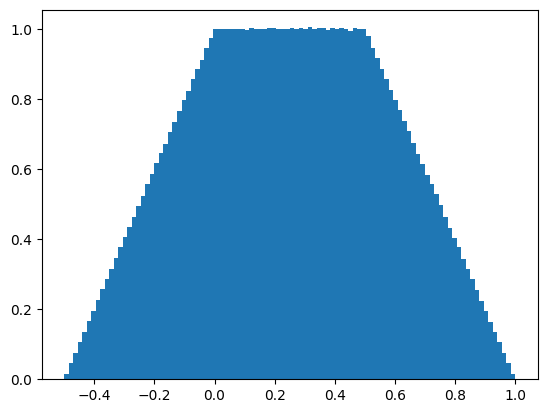

In [4]:
import numpy as np
import matplotlib.pyplot as plot

M = 1000
N = 10000000

def sampleElements(wSeeds, b):

    ws = []

    for wSeed in wSeeds:
        if wSeed < b*0.5:
            # wSeed(cdf) = 0.5*(b+w)*((b+w)/b) = (b+w)^2/2b
            w = -b + np.sqrt(2 * wSeed * b)
        elif wSeed < (1 - b*0.5):
            # wSeed(cdf) = 0.5*(2w+b)*1 = w + 0.5b
            w = wSeed - b*0.5
        else:
            #wSeed(cdf) = 1 - 0.5*(1-w)*((1-w)/b)
            w = 1 - np.sqrt(2*b*(1 - wSeed))

        ws.append(w)

    return np.array(ws)

b = np.random.rand(M)

wSeeds = np.random.rand(N)
zSeeds = np.random.rand(N)

w = sampleElements(wSeeds, b = 0.5)

plot.hist(w, 100, density=True)

In [7]:
import numpy as np
import matplotlib.pyplot as plot

M = 10000
N = 10000

def sampleElements(wSeeds, b):

    ws = []

    for wSeed in wSeeds:
        if wSeed < b*0.5:
            # wSeed(cdf) = 0.5*(b+w)*((b+w)/b) = (b+w)^2/2b
            w = -b + np.sqrt(2 * wSeed * b)
        elif wSeed < (1 - b*0.5):
            # wSeed(cdf) = 0.5*(2w+b)*1 = w + 0.5b
            w = wSeed - b*0.5
        else:
            #wSeed(cdf) = 1 - 0.5*(1-w)*((1-w)/b)
            w = 1 - np.sqrt(2*b*(1 - wSeed))

        ws.append(w)

    return np.array(ws)

bs = np.random.rand(M)

expectation = 0

for b in bs:
    wSeeds = np.random.rand(N)
    zSeeds = np.random.rand(N)

    ws = sampleElements(wSeeds, b)
    zs = sampleElements(zSeeds, b)

    subExpectation = 0

    for w, z in zip(ws, zs):
        if np.abs(w) > np.abs(z):
            subExpectation += w
        else:
            subExpectation += z

    expectation += subExpectation / N

print(expectation/M)

0.3700299637730018


問題では列の最大値をピボットとするとなっているが、行列の要素が負にもなるような場合を考慮すると、0はピボットにできない。

そのため、絶対値の最大値をピボットとするのが良いのではないかと想像する。

以下で、自前のコードを書いた。微小な計算誤差があるが、scipyの結果とほぼ一致しており、絶対値を取っていることが想定される。

In [9]:
import numpy as np

N = 10000000
dim = 3

def myLU(A):
    size = len(A)

#    print("original : ")
#    print(A)
    
    for i in range(size):
#        print("i : ", i)
        index = np.argmax(np.abs(A[i:, i])) + i
        tmp = np.array(A[i, : ])
        A[i, : ] = A[index, : ]
        A[index, : ] = tmp

#        print(A)

        for j in range(i + 1, size):
            A[j, : ] -= (A[j, i] / A[i, i]) * A[i, : ]
#        print(A)

    return A

sum = np.zeros((dim,dim))

for i in range(N):
    A = np.random.rand(dim, dim)
#    print(A)

    U = myLU(A)
#    print(L)
#    print(U)
#    print(P)

    sum += U

sum = sum / N
print("sum : \n", sum)

sum : 
 [[ 7.50033339e-01  4.99939590e-01  5.00050128e-01]
 [-7.00751173e-22  3.71426537e-01  2.64055946e-01]
 [-2.25862077e-21  2.87458425e-21  1.80151454e-01]]
